In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

import csv


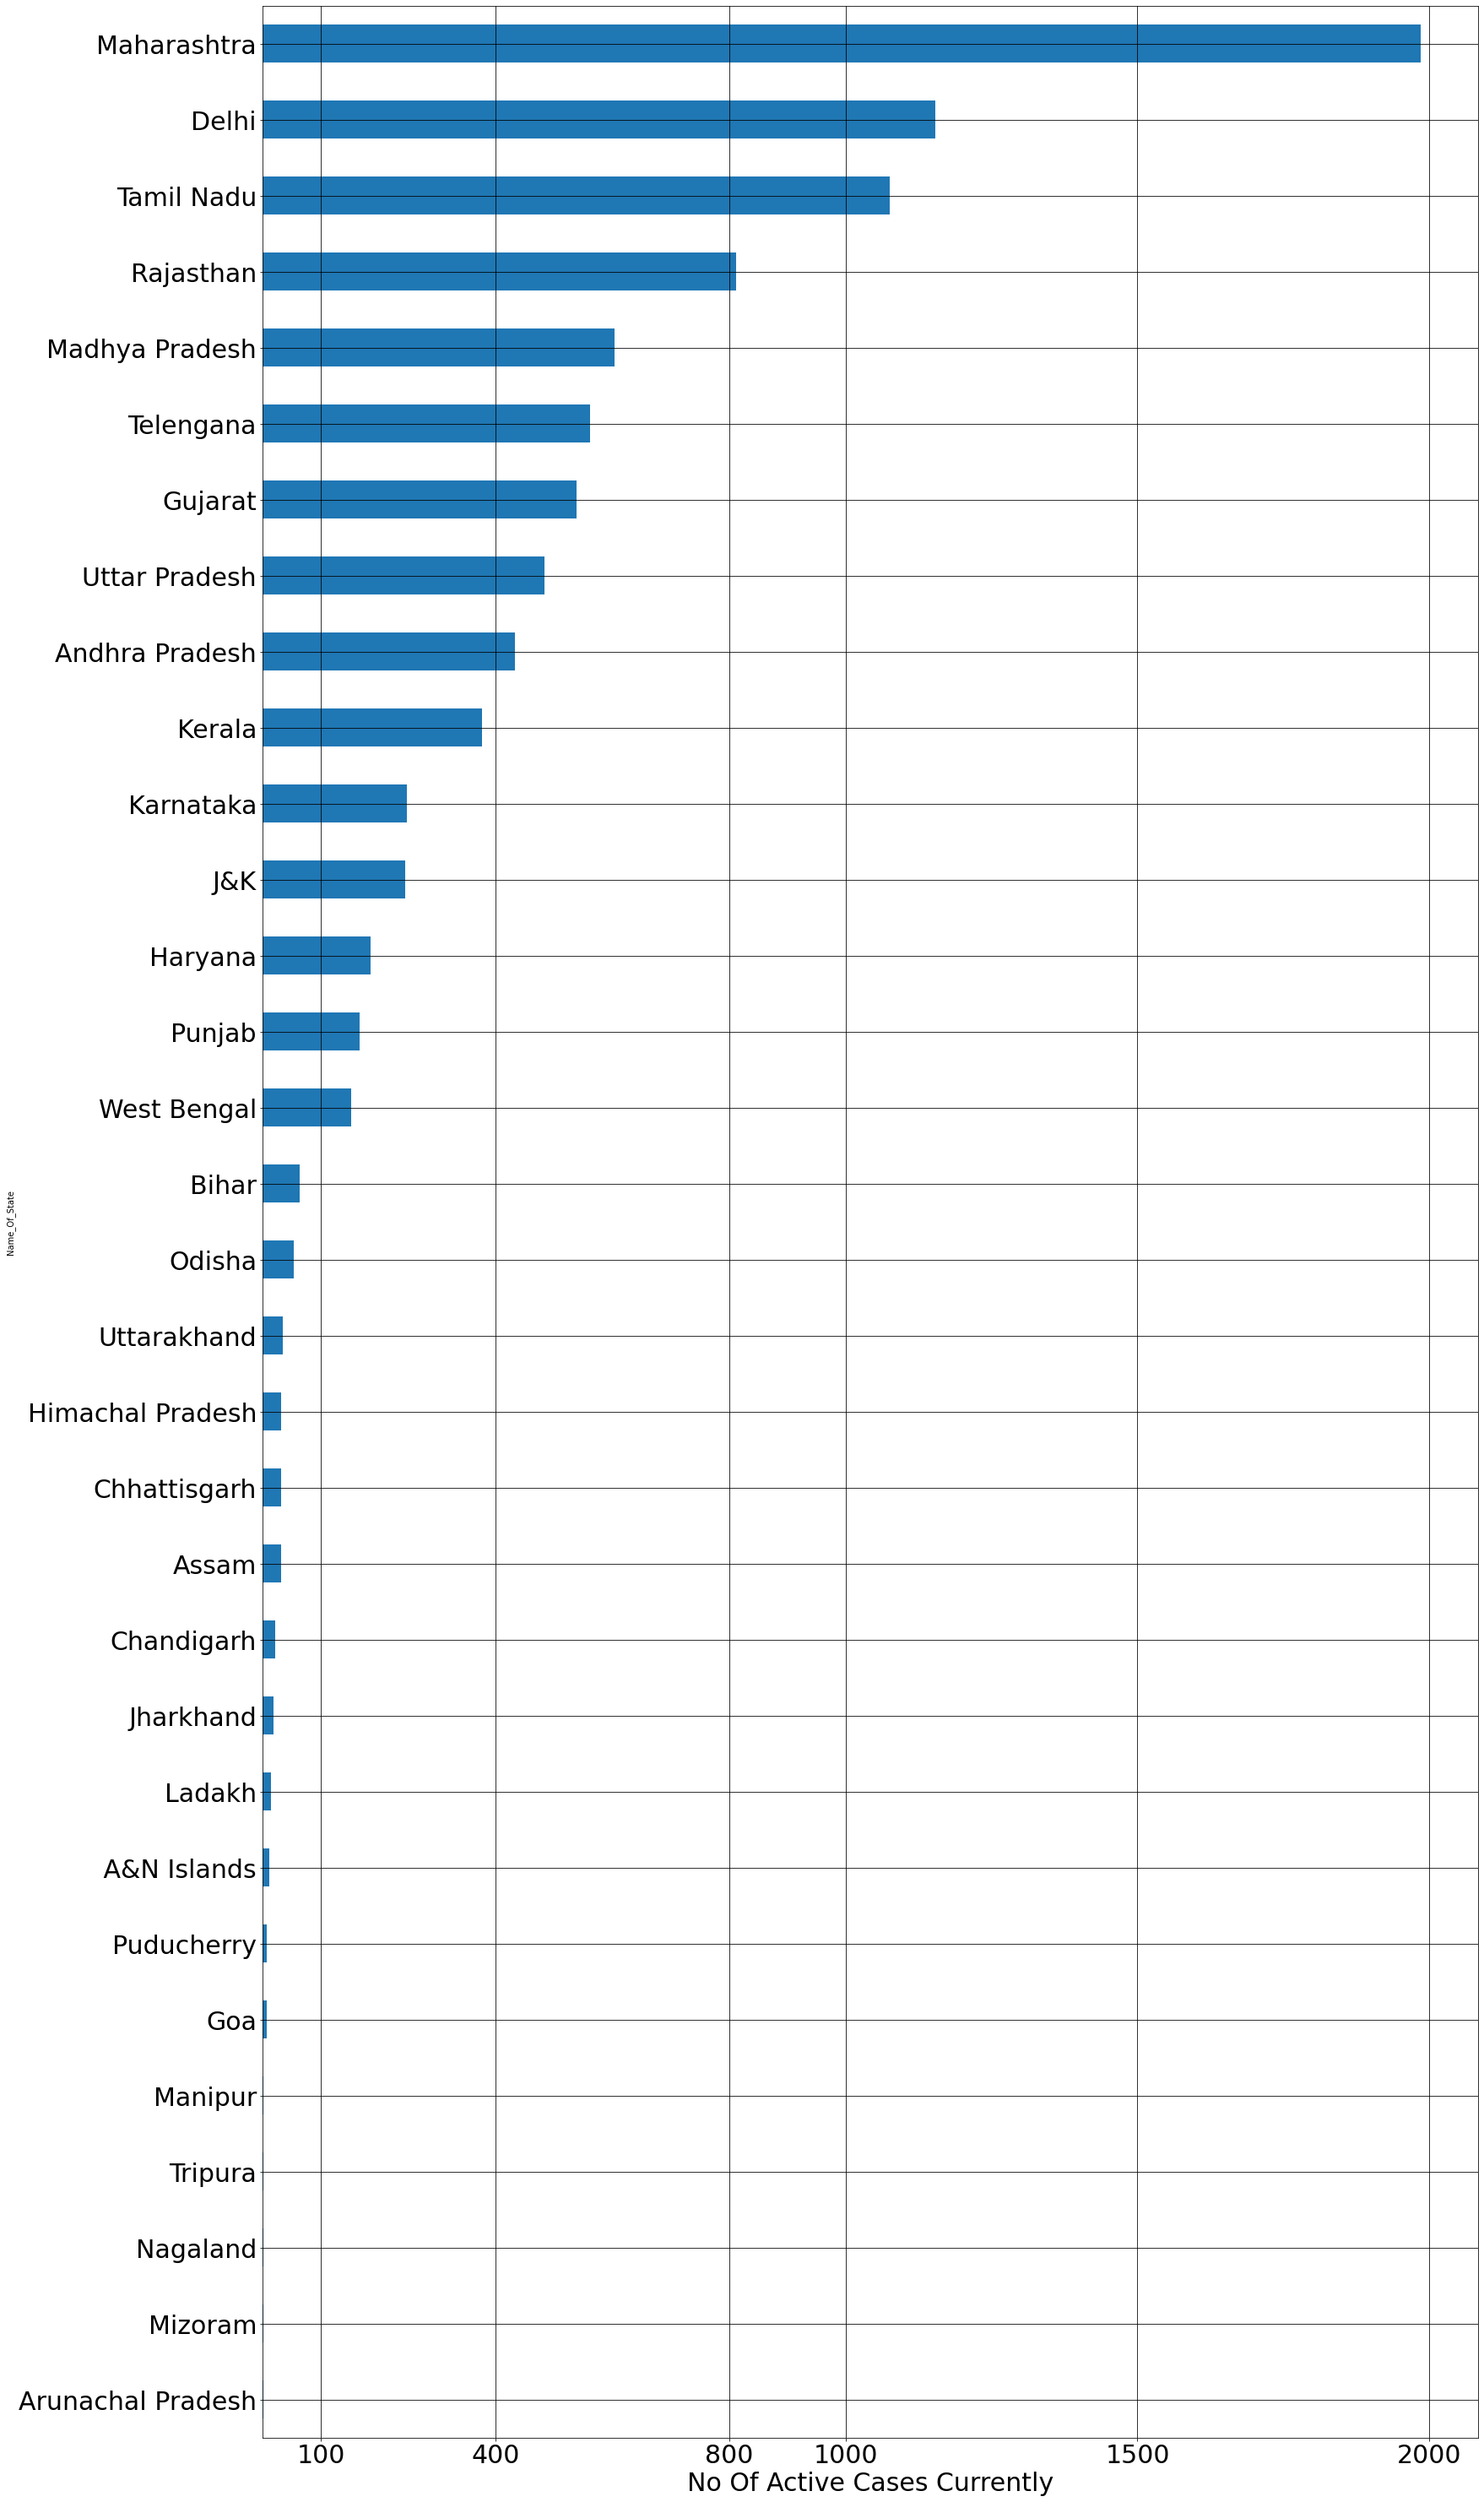

In [2]:
url="https://www.mohfw.gov.in/"
# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text
    # Parse the html content
soup = BeautifulSoup(html_content, "lxml")
gdp_table = soup.find("table", attrs={"class": "table table-striped"})
gdp_table_data = gdp_table.tbody.find_all("tr")  # contains 2 rows
#print("S. No\t Name of State\tTotal Confirmed cases\t Cured\tMigrated\tDeath")

l = []
for tr in gdp_table_data:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
df=pd.DataFrame(l, columns=["S.No  ", "Name_Of_State", "Confirmed_Cases" ,"Cured","Death"])
df = df.replace('\n','     ', regex=True)
df = df.replace('Total number of confirmed cases in India',' Total Cases ')
df = df.replace('Jammu and Kashmir','J&K')
df = df.replace('Andaman and Nicobar Islands',' A&N Islands')




df.drop(df.tail(1).index,inplace=True) 
df.drop(df.tail(1).index,inplace=True) 




df.to_csv(r"C:\Users\AnujoyPC\AppData\Local\Programs\Python\Corona.csv", index = False)

#dataframe to html page
html = df.to_html()

#write html to file
text_file = open("index.html", "w")
text_file.write(html)
text_file.close()
    


    
    
    
 #plot in graph   
cities = pd.read_csv (r"C:\Users\AnujoyPC\AppData\Local\Programs\Python\Corona.csv")
fig = plt.figure(figsize=(20,40))
ax = fig.add_axes([0.5,0.5, 1, 1 ])
ax.set_xticks([100,400,800,1000,1500,2000,2500])
states = cities.groupby('Name_Of_State')['Confirmed_Cases'].sum().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 30)

plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.xlabel('No Of Active Cases Currently', fontsize = 30)

plt.show ()



  




In [3]:
print("According To Govt. Data Taken From MoHFW Website Of INDIA")

a= df['Confirmed_Cases']

Cases = 0
for i in a:
    Cases = Cases + int(i)

print("Total Confirmed Active Cases => ",Cases)




a= df['Cured']

cure = 0
for i in a:
    cure = cure+ int(i)

print("Total Cured => ",cure)




a= df['Death']

death = 0
for i in a:
    death = death + int(i)

print("Total Death => ",death)

from IPython.display import HTML
HTML(df.to_html(index=False))




According To Govt. Data Taken From MoHFW Website Of INDIA
Total Confirmed Active Cases =>  9352
Total Cured =>  980
Total Death =>  324


S.No,Name_Of_State,Confirmed_Cases,Cured,Death
1,Andhra Pradesh,432,11,7
2,A&N Islands,11,10,0
3,Arunachal Pradesh,1,0,0
4,Assam,31,0,1
5,Bihar,64,26,1
6,Chandigarh,21,7,0
7,Chhattisgarh,31,10,0
8,Delhi,1154,27,24
9,Goa,7,5,0
10,Gujarat,539,47,26
